In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("D://baseball.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


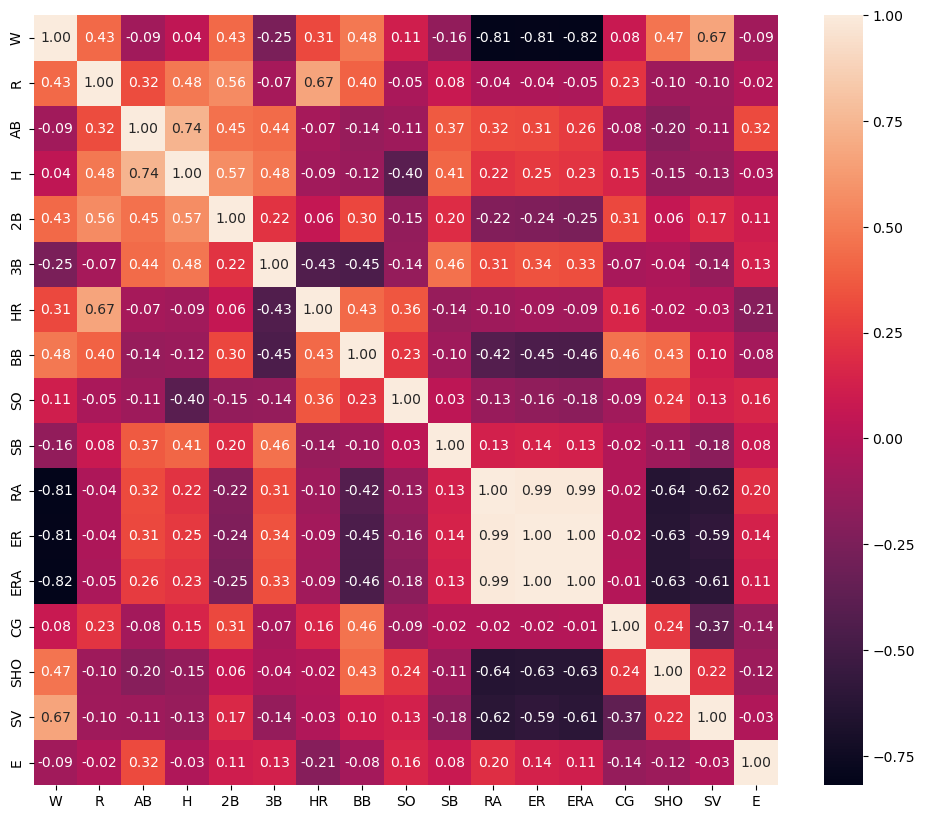

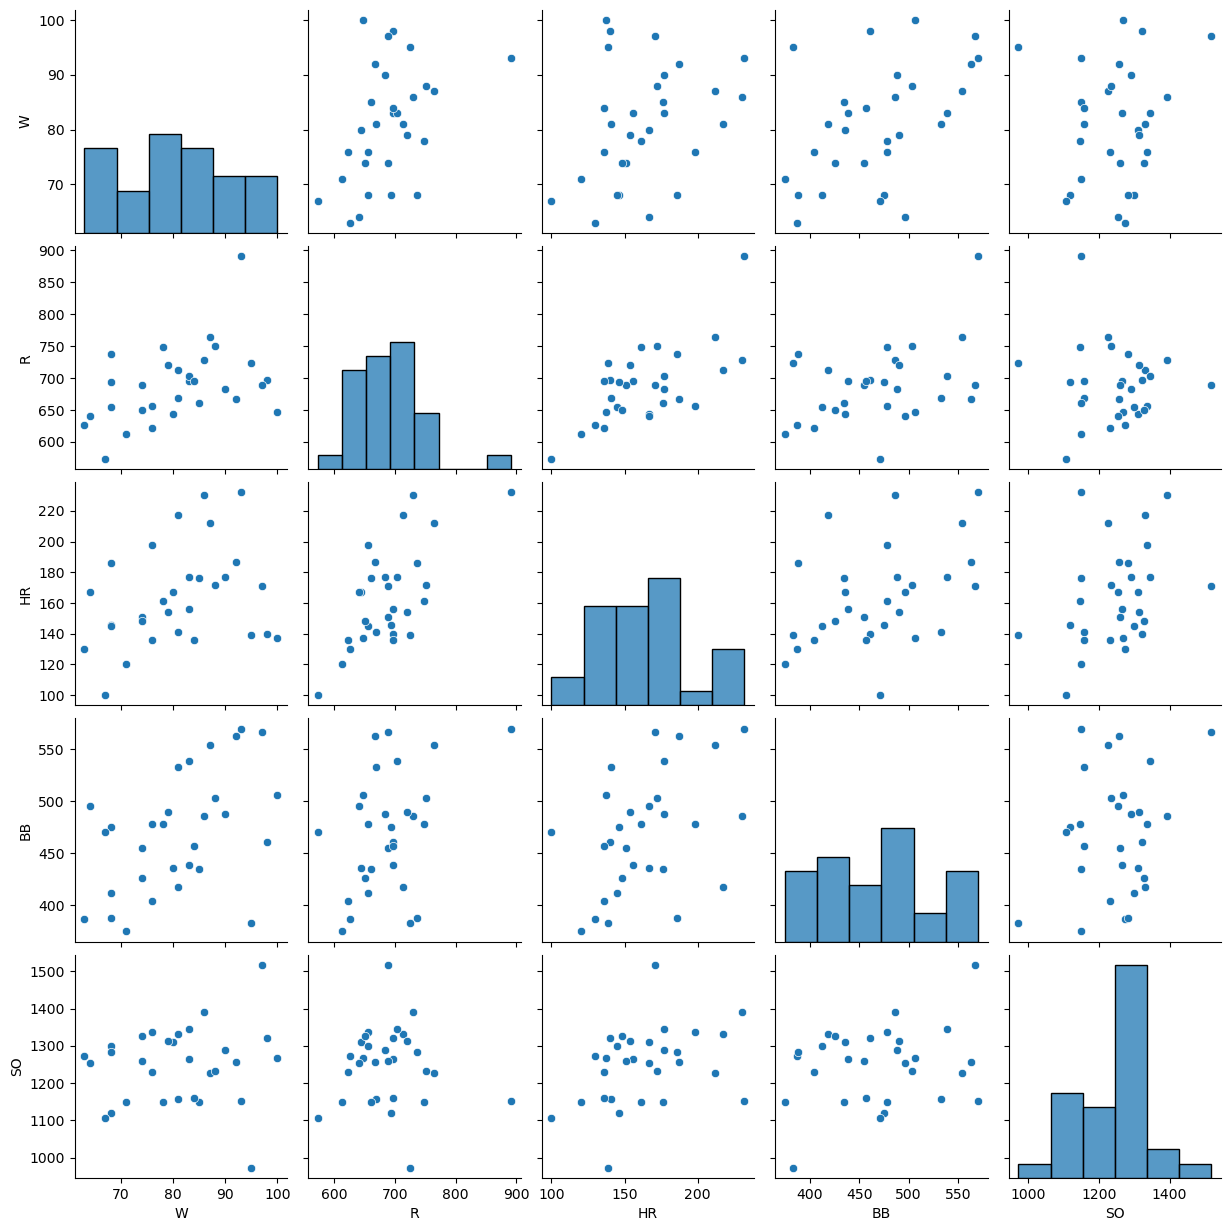

In [6]:
data.info()
data.describe()

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

sns.pairplot(data[['W', 'R', 'HR', 'BB', 'SO']])
plt.show()


In [7]:
data = data.dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['W']))

X = pd.DataFrame(scaled_features, columns=data.columns.drop('W'))
y = data['W']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


In [9]:
def evaluate_model(model, X_test, y_test, predictions):
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    print(f"Model: {model}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")

evaluate_model('Linear Regression', X_test, y_test, lr_predictions)

evaluate_model('Random Forest Regressor', X_test, y_test, rf_predictions)


Model: Linear Regression
RMSE: 5.286116959230833
R²: 0.7876400316149373
Model: Random Forest Regressor
RMSE: 7.184248974898719
R²: 0.6077509816339458


In [10]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test)
evaluate_model('Tuned Random Forest Regressor', X_test, y_test, best_rf_predictions)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Model: Tuned Random Forest Regressor
RMSE: 7.63189845805577
R²: 0.5573461121666319


In [11]:
final_model = best_rf_model


In [14]:
import joblib
joblib.dump(final_model, 'best_baseball_model.pkl')


['best_baseball_model.pkl']

In [13]:
# Baseball Win Prediction Case Study

## Introduction
This project utilizes data from the 2014 Major League Baseball seasons to predict the number of wins for a team in the 2015 season based on various features.

## Data Overview
- Number of samples: ...
- Number of features: ...
- Features: ...

## Methodology
1. Data Import and Preprocessing
2. Exploratory Data Analysis
3. Model Building and Evaluation
4. Hyperparameter Tuning
5. Final Model Selection

## Findings
- Best performing model: Tuned Random Forest Regressor
- Performance metrics: RMSE: ..., R²: ...

## Conclusion
The tuned Random Forest model provided the best performance based on RMSE and R² metrics.


SyntaxError: invalid character '²' (U+00B2) (1934850521.py, line 20)